In [1]:
import os
import io
import PIL.Image, PIL.ImageDraw
import matplotlib.pyplot as plt
import requests
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

from tqdm import tqdm

from helpers import *

# Notebook dependencies
from IPython.display import clear_output, Image

# MNIST

In [2]:
img_size, batch_size = 28, 8

transforms = torchvision.transforms.Compose([
    # torchvision.transforms.Resize(80),
    torchvision.transforms.RandomResizedCrop(img_size, scale=(0.8, 1.0)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5,), (0.5,)) # global mean and std of MNIST
])
    
dataset_mnist = torchvision.datasets.MNIST(root='datasets', train=False, download=True, transform=transforms)
dataloader_mnist = torch.utils.data.DataLoader(dataset_mnist, batch_size=batch_size, shuffle=True)  


In [3]:
examples = enumerate(dataloader_mnist)
batch_idx, (example_data, example_targets) = next(examples)

In [4]:
batch_idx

0

In [113]:
dataset = torchvision.datasets.MNIST(root='./datasets', download=True, train=False, transform=transforms)

In [114]:
dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./datasets
    Split: Test
    StandardTransform
Transform: Compose(
               Resize(size=80, interpolation=bilinear, max_size=None, antialias=None)
               RandomResizedCrop(size=(64, 64), scale=(0.8, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear), antialias=None)
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

torch.Size([10000, 28, 28])


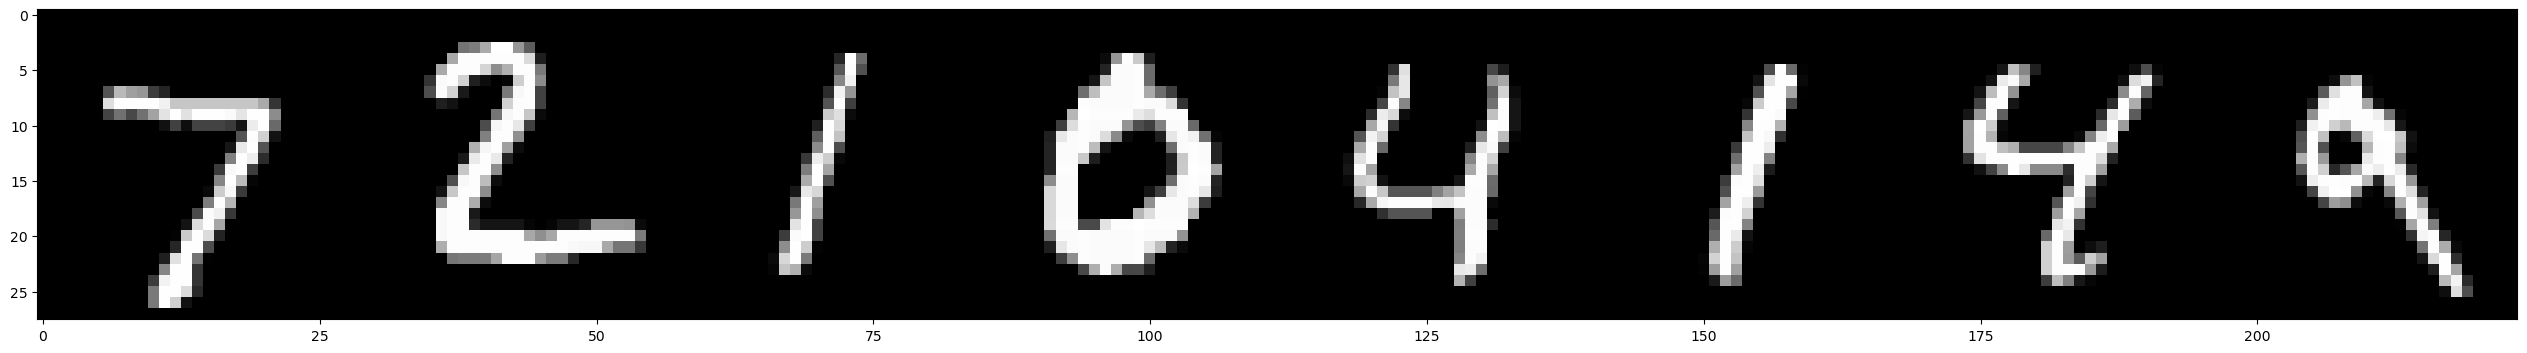

tensor([7, 2, 1, 0, 4, 1, 4, 9])


In [115]:
data = dataset.data
print(data.shape)
plot_images(data[:8, ...].unsqueeze(1))
print(dataset.targets[:8])

In [116]:
dataset.data.min(), dataset.data.max()

(tensor(0, dtype=torch.uint8), tensor(255, dtype=torch.uint8))

In [5]:
%%time

# Referenced: https://stackoverflow.com/questions/70698487/how-to-get-a-pytorch-data-loader-per-class

subsets = {target: 
               torch.utils.data.Subset(
                   dataset_mnist, 
                       [i for i, (x, y) in enumerate(dataset_mnist) if y == target]
               ) for _, target in dataset_mnist.class_to_idx.items()
            }
loaders = {target: torch.utils.data.DataLoader(subset, batch_size=8) for target, subset in subsets.items()}

CPU times: user 1min, sys: 119 ms, total: 1min
Wall time: 1min 11s


In [15]:
# Try to save the loaders
torch.save(loaders, 'mnist_classed.pkl')

In [190]:
test_load = torch.load('mnist_classed.pkl')

In [177]:
def get_batched_loader(loaders, class_number, batch_size=8):
    loader = loaders[class_number]
    batch_size = 8
    for idx in range(0, len(loader), batch_size):
        loaders
        print(data.shape)
        print(label.shape)
        break

torch.Size([1, 1, 64, 64])
torch.Size([1])


In [7]:
batch_idx, (example_data, example_targets) = next(enumerate(loaders[0]))

In [191]:
test_load[0]

In [8]:
example_data.shape, example_targets.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [169]:
images = []
for (i, (_, image)) in enumerate(class0):
    if i == 8:
        break
    images.append(image[0, ...])
images = torch.tensor(images)

In [170]:
example_targets

tensor([0])

In [13]:
def plot_images(images):
    # Expect PyTorch shaping convention
    plt.figure(figsize=(32, 32))
    plt.imshow(torch.cat([
        torch.cat([i for i in images.cpu()], dim=-1)
    ], dim=-2).permute(1, 2, 0).cpu(), cmap='gray')
    plt.show()
    

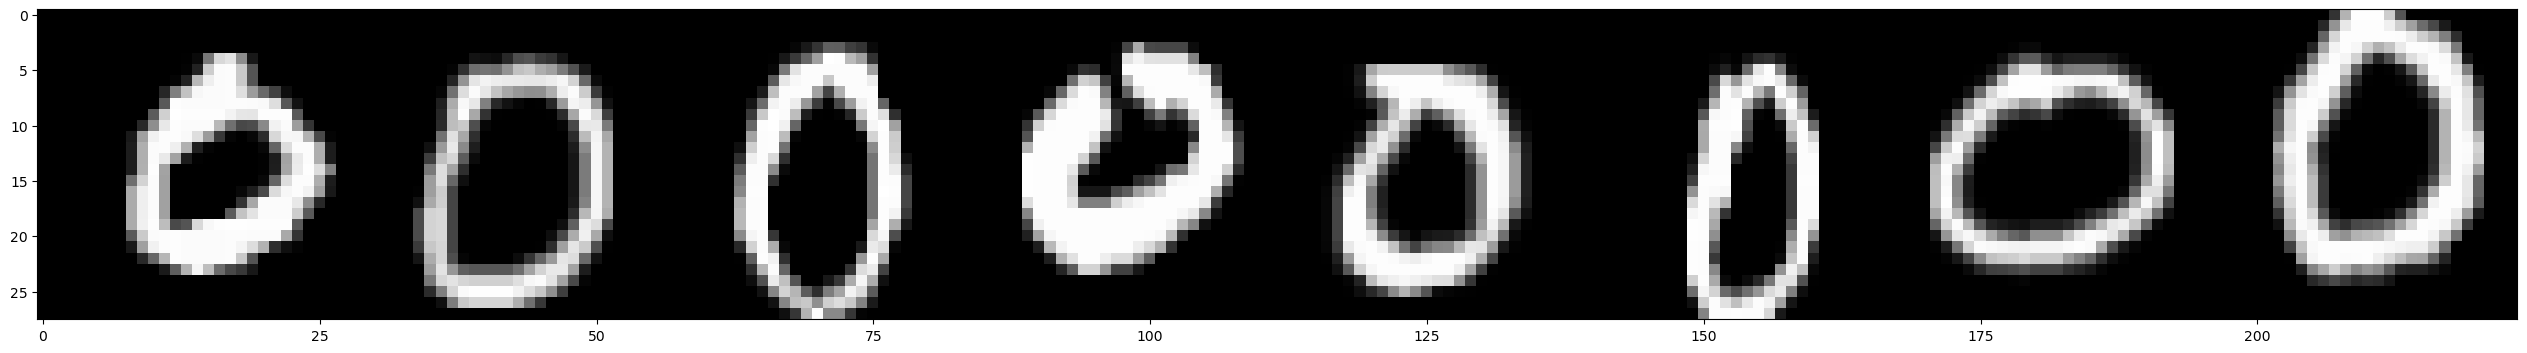

In [14]:
plot_images(example_data)

(array([2637.,  106.,   86.,   88.,   68.,   75.,   85.,   80.,  130.,
         741.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

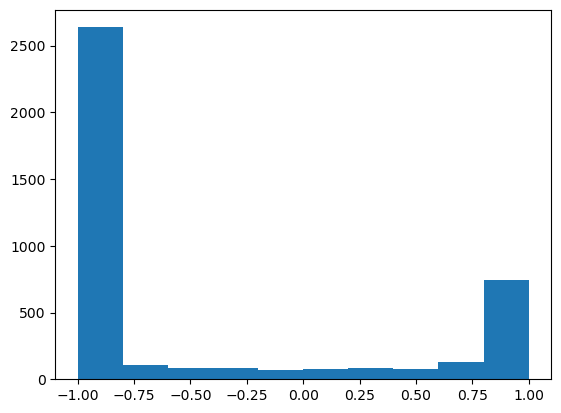

In [92]:
plt.hist(example_data[0].flatten())

In [95]:
example_data.min(), example_data.max(), example_data.dtype

(tensor(-1.), tensor(1.), torch.float32)

## Polkadots

In [ ]:
def imread(url, max_size=None, mode=None):
  if url.startswith(('http:', 'https:')):
    # wikimedia requires a user agent
    headers = {
      "User-Agent": "Requests in Colab/0.0 (https://colab.research.google.com/; no-reply@google.com) requests/0.0"
    }
    r = requests.get(url, headers=headers)
    f = io.BytesIO(r.content)
  else:
    f = url
  img = PIL.Image.open(f)
  if max_size is not None:
    img.thumbnail((max_size, max_size), PIL.Image.Resampling.LANCZOS)
  if mode is not None:
    img = img.convert(mode)
  img = np.float32(img)/255.0
  return img

url = 'https://www.robots.ox.ac.uk/~vgg/data/dtd/thumbs/dotted/dotted_0201.jpg'
style_img = imread(url, max_size=28)

print(style_img.shape)
imshow(style_img)

img_size, batch_size = 28, 8

transforms = torchvision.transforms.Compose([
    # torchvision.transforms.Resize(80),
    torchvision.transforms.RandomResizedCrop(img_size, scale=(0.8, 1.0)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5,), (0.5,)) # global mean and std of MNIST
])

transformed_img = transforms(np2pil(style_img))

# DTD

In [3]:
img_size, batch_size = 28, 8

transforms = torchvision.transforms.Compose([
    # torchvision.transforms.Resize(80),
    torchvision.transforms.RandomResizedCrop(img_size, scale=(0.8, 1.0)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5,), (0.5,)) # global mean and std of MNIST
])
    
dataset_dtd = torchvision.datasets.DTD(root='datasets', download=True, transform=transforms)
dataloader_dtd = torch.utils.data.DataLoader(dataset_dtd, batch_size=batch_size, shuffle=True)  


In [7]:
def get_dtd():
    img_size, batch_size = 28, 8

    transforms = torchvision.transforms.Compose([
        # torchvision.transforms.Resize(80),
        torchvision.transforms.RandomResizedCrop(img_size, scale=(0.8, 1.0)),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.5,), (0.5,)) # global mean and std of MNIST
    ])
    K = 800 # enter your length here
    dataset_dtd = torchvision.datasets.DTD(root='datasets', download=False, transform=transforms)
    
    
    subsample_train_indices = torch.randperm(len(dataset_dtd))[:K]
    subloader_mnist = torch.utils.data.DataLoader(dataset_dtd, batch_size=8, 
                              sampler=torch.utils.data.SubsetRandomSampler(subsample_train_indices))    
    
    return dataset_dtd  

dataset_dtd = get_dtd()

In [8]:
dataset_dtd

Dataset DTD
    Number of datapoints: 1880
    Root location: datasets
    split=train, partition=1
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(28, 28), scale=(0.8, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear), antialias=None)
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

torch.Size([8, 3, 28, 28])
tensor([ 7, 26, 34, 31, 13, 26,  1, 43])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


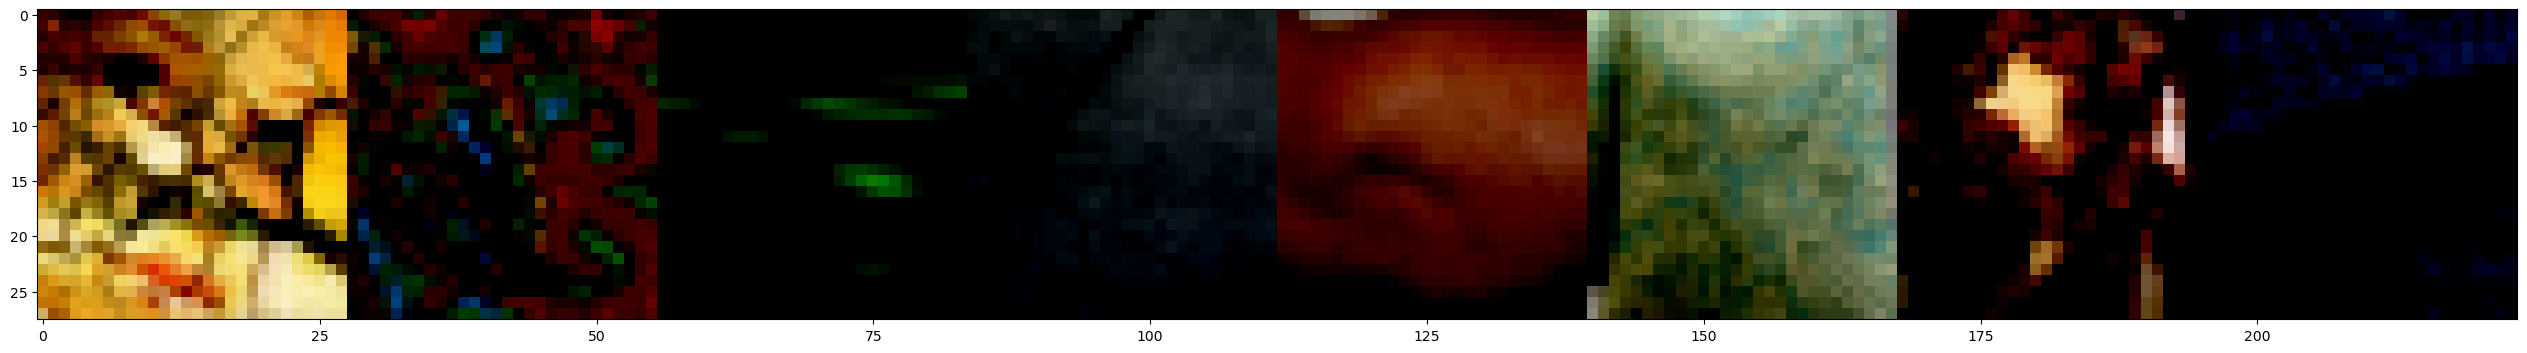

In [9]:
for idx, (data, label) in enumerate(dataloader_dtd):
    print(data.shape)
    print(label)
    plot_images(data)
    break

In [62]:
dataset_dtd.class_to_idx

{'banded': 0,
 'blotchy': 1,
 'braided': 2,
 'bubbly': 3,
 'bumpy': 4,
 'chequered': 5,
 'cobwebbed': 6,
 'cracked': 7,
 'crosshatched': 8,
 'crystalline': 9,
 'dotted': 10,
 'fibrous': 11,
 'flecked': 12,
 'freckled': 13,
 'frilly': 14,
 'gauzy': 15,
 'grid': 16,
 'grooved': 17,
 'honeycombed': 18,
 'interlaced': 19,
 'knitted': 20,
 'lacelike': 21,
 'lined': 22,
 'marbled': 23,
 'matted': 24,
 'meshed': 25,
 'paisley': 26,
 'perforated': 27,
 'pitted': 28,
 'pleated': 29,
 'polka-dotted': 30,
 'porous': 31,
 'potholed': 32,
 'scaly': 33,
 'smeared': 34,
 'spiralled': 35,
 'sprinkled': 36,
 'stained': 37,
 'stratified': 38,
 'striped': 39,
 'studded': 40,
 'swirly': 41,
 'veined': 42,
 'waffled': 43,
 'woven': 44,
 'wrinkled': 45,
 'zigzagged': 46}

In [69]:
dataloader_dtd.dataset[3]

(tensor([[[ 0.3882,  0.1765,  0.2000,  ...,  0.5373,  0.6314,  0.1059],
          [ 0.3804,  0.1686,  0.1765,  ...,  0.5137,  0.6157,  0.0980],
          [ 0.3804,  0.1608,  0.1686,  ...,  0.4902,  0.5922,  0.1059],
          ...,
          [-0.0275, -0.0431, -0.1608,  ...,  0.1922,  0.2706, -0.1059],
          [-0.0353, -0.0667, -0.1922,  ...,  0.1686,  0.2392, -0.1608],
          [-0.0588, -0.0824, -0.2078,  ...,  0.1529,  0.2314, -0.2000]],
 
         [[ 0.0353,  0.0824,  0.1059,  ...,  0.0510,  0.1529, -0.1294],
          [ 0.0275,  0.0745,  0.0824,  ...,  0.0353,  0.1373, -0.1529],
          [ 0.0275,  0.0745,  0.0745,  ...,  0.0275,  0.1137, -0.1608],
          ...,
          [-0.1294, -0.1373, -0.2235,  ..., -0.2235, -0.1686, -0.3725],
          [-0.1294, -0.1608, -0.2627,  ..., -0.2392, -0.1843, -0.4039],
          [-0.1529, -0.1765, -0.2706,  ..., -0.2549, -0.1843, -0.4275]],
 
         [[-0.0353,  0.0667,  0.0745,  ..., -0.2157, -0.4667, -0.2784],
          [-0.0510,  0.0588,

In [58]:
dataloader_dtd.batch_sampler(

In [43]:
len(dataset_dtd)

1880

In [70]:
idx = dataset_dtd.class_to_idx['bubbly']
print(idx)
polkadots = dataset_dtd[idx]
len(polkadots)
polkadots[0].shape

3


torch.Size([3, 28, 28])

In [36]:
polkadots[0].shape

torch.Size([3, 28, 28])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


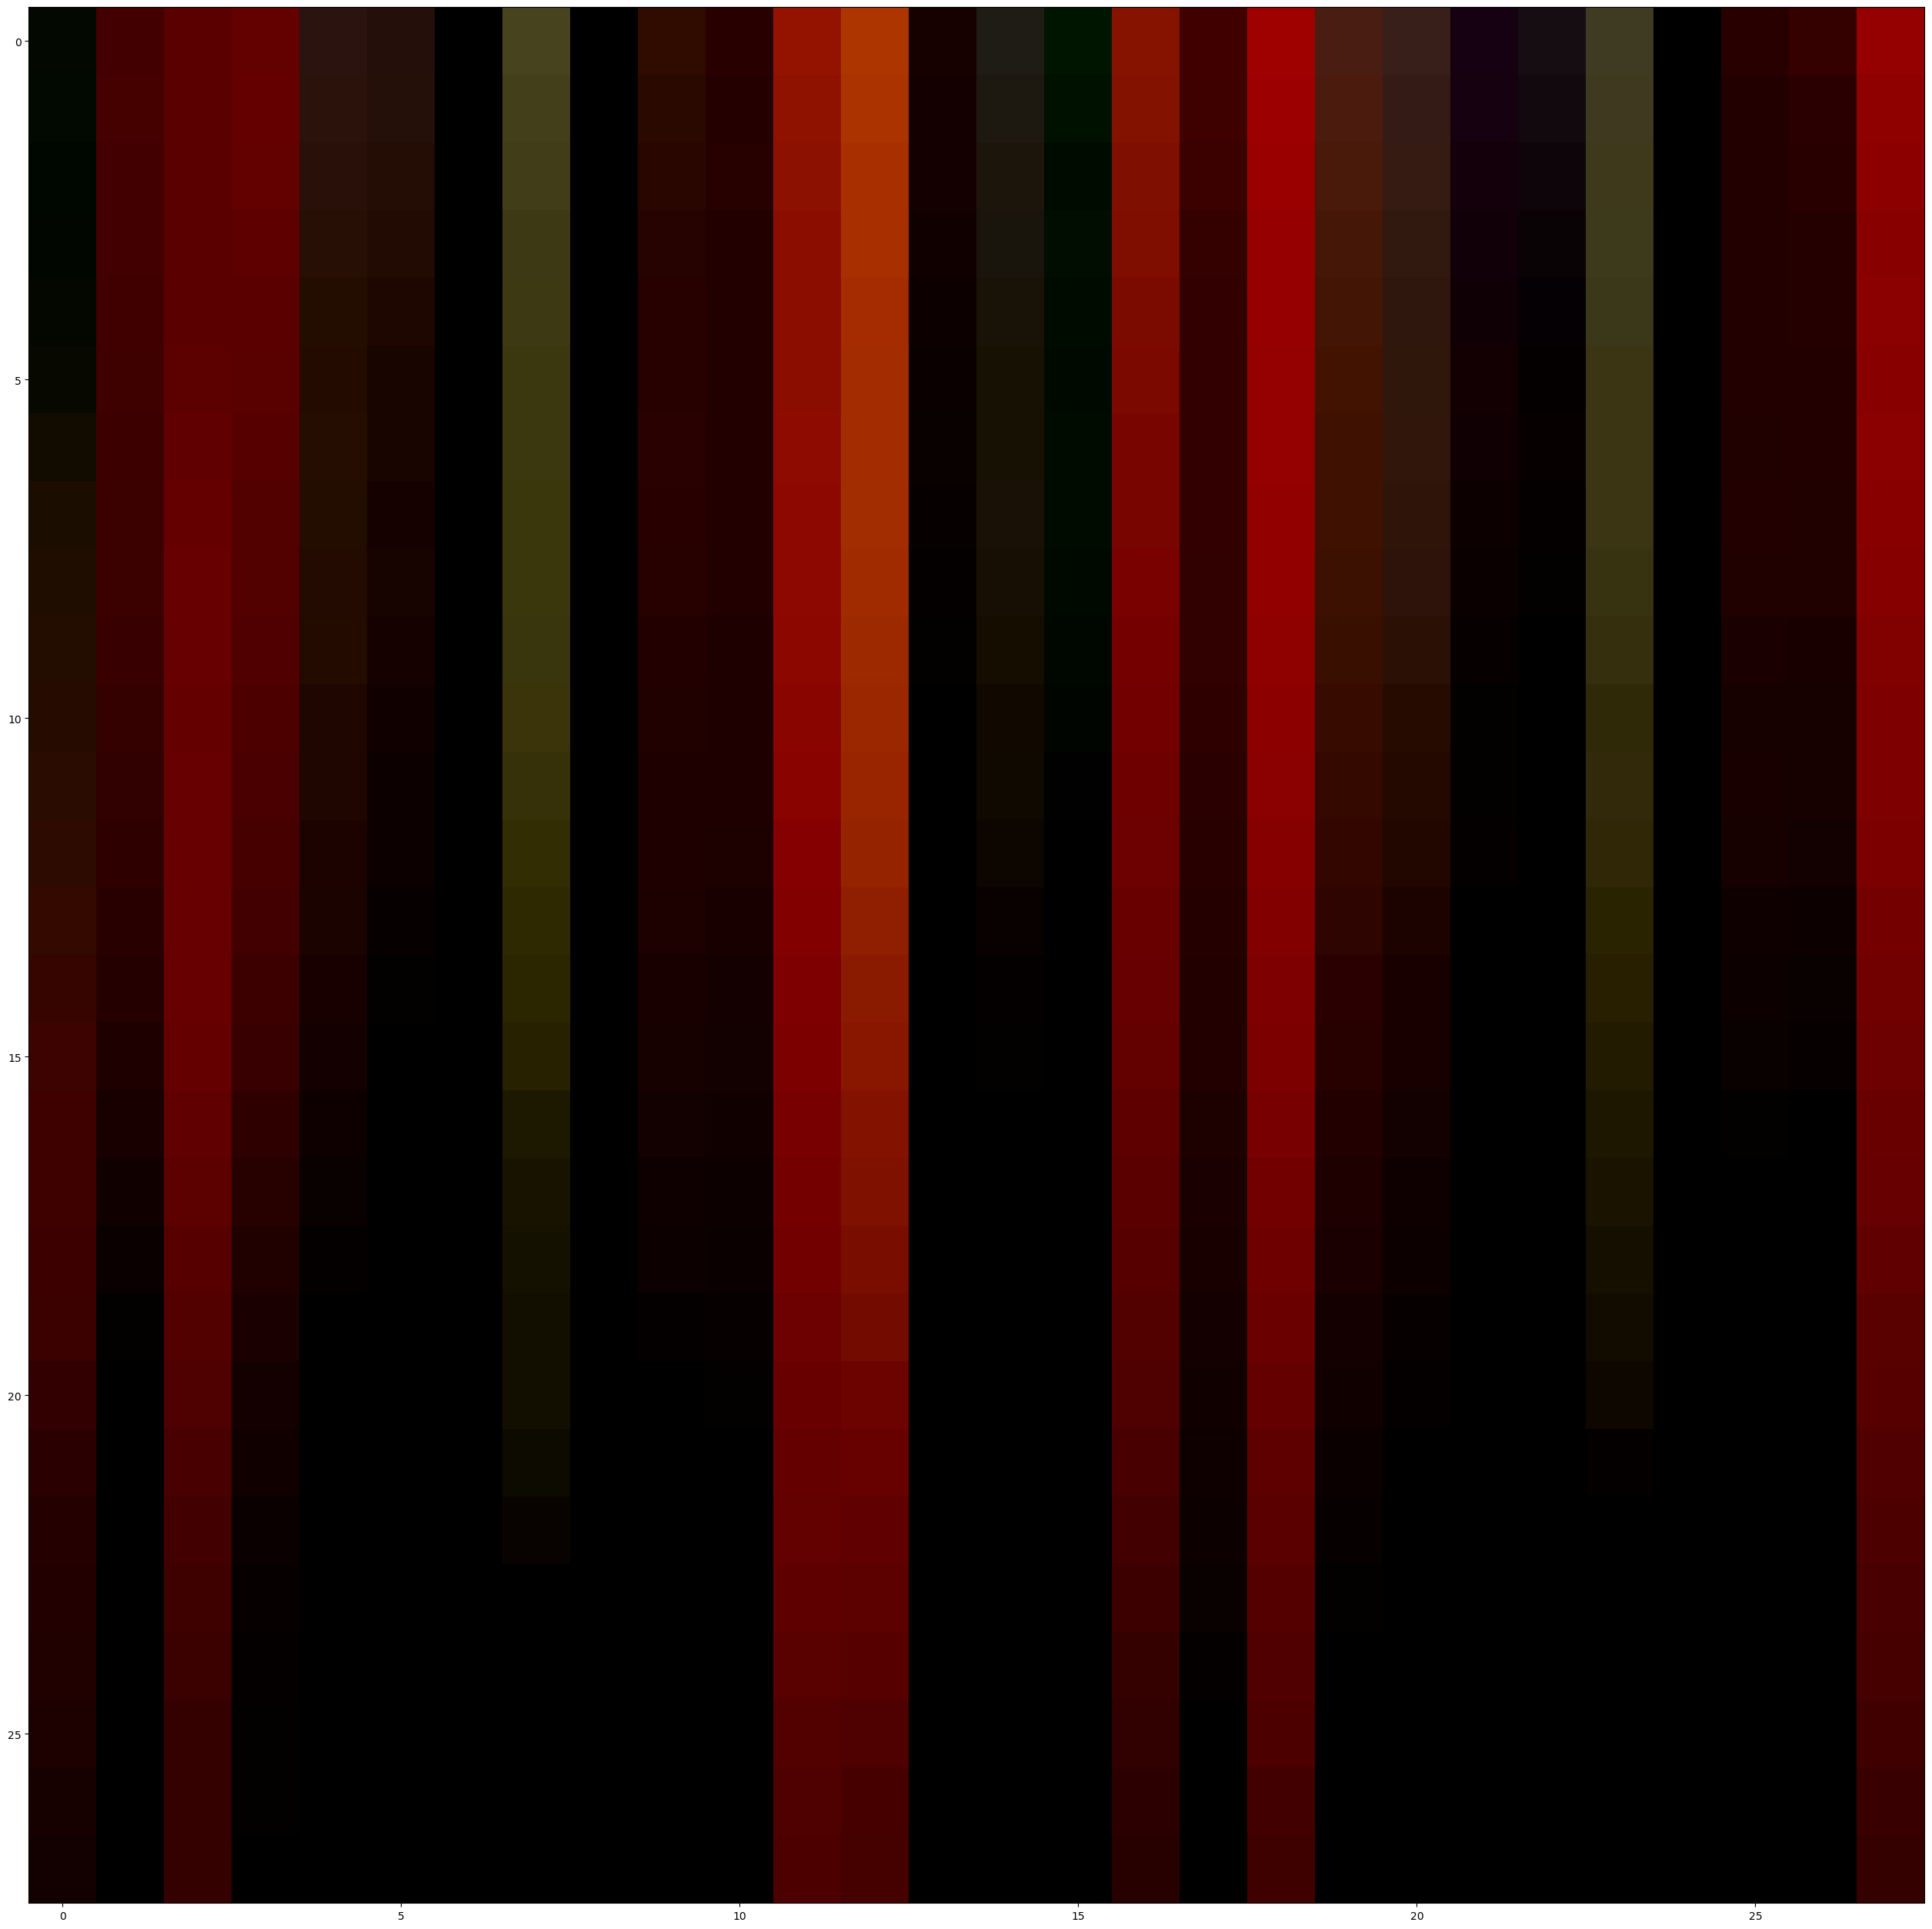

In [71]:
plot_images(polkadots[0].unsqueeze(0))

In [60]:
dataset_dtd[idx][0].min(), dataset_dtd[idx][0].max(), dataset_dtd[idx][0].dtype

(tensor(-0.6157), tensor(0.9922), torch.float32)

## CIFAR

In [ ]:
    K = 1000 # enter your length here
    dataset_mnist = torchvision.datasets.MNIST(root='datasets', train=False, download=False, transform=transforms)
    subsample_train_indices = torch.randperm(len(dataset_mnist))[:K]
    subloader_mnist = torch.utils.data.DataLoader(dataset_mnist, batch_size=BATCH_SIZE, 
                              sampler=torch.utils.data.SubsetRandomSampler(subsample_train_indices))    
    
    return subloader_mnist    

In [89]:
def get_cifar(download=False, img_size=28, batch_size=8):
    transforms = torchvision.transforms.Compose([
        torchvision.transforms.RandomResizedCrop(img_size, scale=(0.8, 1.0)),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
    K = 5000
    
    dataset_cifar = torchvision.datasets.CIFAR10(root='datasets', train=False, download=download, transform=transforms)
    subsample_train_indices = torch.randperm(len(dataset_cifar))[:K]
    subloader_cifar = torch.utils.data.DataLoader(dataset_cifar, batch_size=batch_size, 
                              sampler=torch.utils.data.SubsetRandomSampler(subsample_train_indices))     
    return subloader_cifar

In [90]:
subloader_cifar = get_cifar()
len(subloader_cifar)

625

In [72]:
def get_data(dataset_name, download=False, img_size=28, batch_size=8):
    transforms = torchvision.transforms.Compose([
        # torchvision.transforms.Resize(80),
        torchvision.transforms.RandomResizedCrop(img_size, scale=(0.8, 1.0)),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
    
    if dataset_name == 'cifar' or dataset_name == 'cifar10' or dataset_name == 'CIFAR10':
        dataset = torchvision.datasets.CIFAR10(root='datasets', download=download, transform=transforms)

    dataloader = torch.utils.data.DataLoader(dataset,
                                              batch_size=batch_size, shuffle=True)        
    return dataloader

In [74]:
dataloader_cifar = get_data('cifar', download=True)

  0%|          | 0/170498071 [00:01<?, ?it/s]

Extracting datasets/cifar-10-python.tar.gz to datasets


In [84]:
for data in subloader_cifar:
    cifar_image, cifar_label = data
    break
print(type(cifar_image), type(cifar_label))

TypeError: 'function' object is not iterable

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


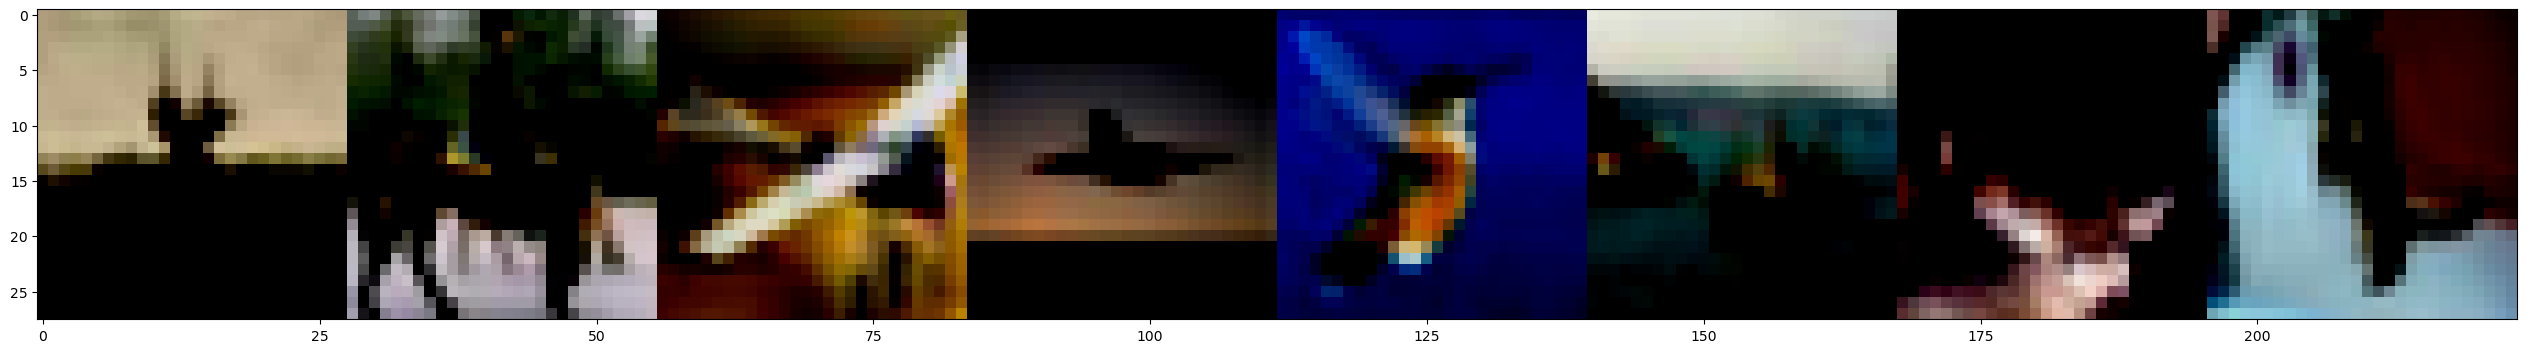

In [76]:
plot_images(cifar_image)

In [77]:
cifar_image.min(), cifar_image.max()

(tensor(-1.), tensor(0.9529))

In [78]:
cifar_image.shape

torch.Size([8, 3, 28, 28])